# Homework 1

## Dependencies

In [7]:
import csv
from matplotlib import pyplot as plt
import typing as t
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [8]:
class Person:
    Gender: str
    Age: int
    Height: float
    Weight: float
    family_history_with_overweight: str
    FAVC: str
    FCVC: int
    NCP: int
    CAEC: str
    SMOKE: str
    CH2O: int
    SCC: str
    FAF: str
    TUE: int
    CALC: str
    MTRANS: str
    NObeyesdad: str

    def __init__(
        self,
        Gender: str,
        Age: int,
        Height: float,
        Weight: float,
        family_history_with_overweight: str,
        FAVC: str,
        FCVC: int,
        NCP: int,
        CAEC: str,
        SMOKE: str,
        CH2O: int,
        SCC: str,
        FAF: int,
        TUE: int,
        CALC: str,
        MTRANS: str,
        NObeyesdad: str,
    ):
        self.Gender = Gender
        self.Age = Age
        self.Height = Height
        self.Weight = Weight
        self.family_history_with_overweight = family_history_with_overweight
        self.FAVC = FAVC
        self.FCVC = FCVC
        self.NCP = NCP
        self.CAEC = CAEC
        self.SMOKE = SMOKE
        self.CH2O = CH2O
        self.SCC = SCC
        self.FAF = FAF
        self.TUE = TUE
        self.CALC = CALC
        self.MTRANS = MTRANS
        self.NObeyesdad = NObeyesdad

    def __str__(self):
        return (
            "{"
            + f'"Gender": "{self.Gender}",'
            + f'"Age": {self.Age},'
            + f'"Height": {self.Height},'
            + f'"Weight": {self.Weight},'
            + f'"family_history_with_overweight": "{self.family_history_with_overweight}",'
            + f'"FAVC": "{self.FAVC}",'
            + f'"FCVC": {self.FCVC},'
            + f'"NCP": {self.NCP},'
            + f'"CAEC": "{self.CAEC}",'
            + f'"SMOKE": "{self.SMOKE}",'
            + f'"CH2O": {self.CH2O},'
            + f'"SCC": {self.SCC},'
            + f'"FAF": "{self.FAF}",'
            + f'"TUE": {self.TUE},'
            + f'"CALC": "{self.CALC}",'
            + f'"MTRANS": "{self.MTRANS}",'
            + f'"NObeyesdad": "{self.NObeyesdad}"'
            + "}"
        )
    
    def __len__(self):
        return 17
    
    __repr__ = __str__

In [9]:
numeric_variables = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
categorical_values = ["FAVC", "CAEC", "CALC", "SCC", "MTRANS", "Gender", "family_history_with_overweight", "SMOKE", "NObeyesdad"]

In [34]:
class DatasetManager:
    def __init__(self, path_to_csv: str):
        self.path_to_csv = path_to_csv

    def load_as_obj_list(self) -> list[Person]:
        with open(self.path_to_csv) as csv_file:
            csv_reader = csv.DictReader(csv_file)
            return [Person(**row) for row in csv_reader]

    @staticmethod
    def obj_list_to_np_array(data: list[Person], attrs_list: list[str] = numeric_variables + categorical_values) -> np.array:
        return np.array([[getattr(entry, field) for field in attrs_list] for entry in data])
    
    @staticmethod
    def obj_list_to_list(data: t.List[Person], attrs_list: t.List[str] = categorical_values) -> t.List[t.List[str]]:
        return [[getattr(entry, field) for field in attrs_list] for entry in data]
    
    @staticmethod
    def obj_list_to_flat_list(data: t.List[Person], attrs_list: t.List[str] = categorical_values) -> t.List[str]:
        return [getattr(entry, field) for field in attrs_list for entry in data]


In [11]:
dataset_manager = DatasetManager("data/ObesityDataSet.csv")
dataset_obj_list = dataset_manager.load_as_obj_list()


## Univariate analysis

The following will be applied:
1. central tendency
1. spread
1. distribution form (skewness, kurtosis)
1. frequency of categorial data
1. graphs
    1. histograms
    1. density
    1. boxplots

### 1. Central tendency

Calculates mean, median and mode for each data series.

In [24]:
def calculate_central_tendency_numerical(np_dataset: np.array) -> t.Tuple[float, float, float]:
    mean = np.mean(np_dataset)
    median = np.median(np_dataset)
    mode = stats.mode(np_dataset).mode

    return mean, median, mode


In [25]:
for numerical_var in numeric_variables:
    dataset_for_numerical_val = (
        DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var])
        .astype(np.float64)
        .reshape(-1)
    )
    mean, median, mode = calculate_central_tendency_numerical(dataset_for_numerical_val)

    print(f"On numerical var {numerical_var}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}\n{['-' * 10]}")
    # MODE nu cred ca e si la variabile numerice

On numerical var Age
Mean: 24.312599908574136
Median: 22.77789
Mode: 18.0
['----------']
On numerical var Height
Mean: 1.7016773533870204
Median: 1.700499
Mode: 1.7
['----------']
On numerical var Weight
Mean: 86.58605812648035
Median: 83.0
Mode: 80.0
['----------']
On numerical var FCVC
Mean: 2.4190430615821885
Median: 2.385502
Mode: 3.0
['----------']
On numerical var NCP
Mean: 2.6856280497394596
Median: 3.0
Mode: 3.0
['----------']
On numerical var CH2O
Mean: 2.0080114040738986
Median: 2.0
Mode: 2.0
['----------']
On numerical var FAF
Mean: 1.0102976958787304
Median: 1.0
Mode: 0.0
['----------']
On numerical var TUE
Mean: 0.657865923732828
Median: 0.62535
Mode: 0.0
['----------']


### 2. Spread

Calculates the spread of data for each data series. Useful to know wether the data has a "central tendency".

In [14]:
def calculate_spread_numerical(np_dataset: np.array) -> t.Tuple[float, float, float]:
    dataset_range = np.ptp(np_dataset)
    dataset_variance = np.var(np_dataset)
    dataset_standard_deviation = np.std(np_dataset)

    return dataset_range, dataset_variance, dataset_standard_deviation

In [15]:
for numerical_var in numeric_variables:
    dataset_for_numerical_val = DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var]).astype(np.float64).reshape(-1)
    dataset_range, dataset_variance, dataset_standard_deviation = calculate_spread_numerical(dataset_for_numerical_val)
    
    print(f"On numerical var {numerical_var}")
    print(f"Range: {dataset_range}")
    print(f"Variance: {dataset_variance}")
    print(f"Standard deviation: {dataset_standard_deviation}")
    print(f"{['-' * 10]}")

On numerical var Age
Range: 47.0
Variance: 40.252236441907115
Standard deviation: 6.344465024090456
['----------']

On numerical var Height
Range: 0.53
Variance: 0.008701665398547784
Standard deviation: 0.09328271757698628
['----------']

On numerical var Weight
Range: 134.0
Variance: 685.6525235841625
Standard deviation: 26.184967511611745
['----------']

On numerical var FCVC
Range: 2.0
Variance: 0.28494254737092756
Standard deviation: 0.5338001005722344
['----------']

On numerical var NCP
Range: 3.0
Variance: 0.6050573820385702
Standard deviation: 0.7778543450020513
['----------']

On numerical var CH2O
Range: 2.0
Variance: 0.3755339558915529
Standard deviation: 0.6128082537723794
['----------']

On numerical var FAF
Range: 3.0
Variance: 0.7231647512870681
Standard deviation: 0.850390940266339
['----------']

On numerical var TUE
Range: 2.0
Variance: 0.3706167598235124
Standard deviation: 0.6087830153868555
['----------']



### 3. Skewness, kurtosis

Calculates skewness and kurtosis of the dataset.

Meaning for skewness:
* Positively skewed (right-skewed):
    * The distribution is positively skewed **if the distribution's tail on the right side is longer or "fatter" than the left side**. This means that there are more data points on the left side, and the distribution as a longer right tail.
    * Values: `> 1`
* Negatively skewed (left-skewed):
    * The distribution is negatively skewed **if the distribution's tail on the left side is longer or "fatter" than the right side**. This means that there are more data points on the right side, and the distribution as a longer left tail.
    * Values: `< -1`
* Symmetric: 
    * If the distribution is _roughly_ the same on both sides, it is symmetric, and the skewness is close to 0.
    * Values: `~ 0`

Meaning of kurtosis:
* Mesokurtic (Normal distribution):
    * A distribution with kurtosis similar to that of a normal distribution
    * Values: `~ 0`
* Leptokurtic:
    * A distribution with pisitive kurtosis, indicating heavier tails and a more peaked central region compared to a normal distribution
    * Values: `> 1`
* Platykurtic:
    * A normal distribution with a negative kurtosis, indicating lighter tails and a flatter central region compared to a normal distribution
    * Values: `< -1`

In [16]:
def calculate_skewness_kurtosis_numerical(np_dataset: np.array) -> t.Tuple[float, float]:
    dataset_skewness = stats.skew(np_dataset)
    dataset_kurtosis = stats.kurtosis(np_dataset)

    return dataset_skewness, dataset_kurtosis

In [29]:
for numerical_var in numeric_variables:
    dataset_for_numerical_val = DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var]).astype(np.float64).reshape(-1)
    dataset_skewness, dataset_kurtosis = calculate_skewness_kurtosis_numerical(dataset_for_numerical_val)
    
    print(f"On numerical var {numerical_var}")
    print(f"Skewness: {dataset_skewness}")
    print(f"Kurtosis: {dataset_kurtosis}")
    print(f"{['-' * 10]}\n")

On numerical var Age
Skewness: 1.5280136160047904
Kurtosis: 2.8168581260901053
['----------']

On numerical var Height
Skewness: -0.012845510609143367
Kurtosis: -0.5644573162265591
['----------']

On numerical var Weight
Skewness: 0.2552289740922699
Kurtosis: -0.7010824249787739
['----------']

On numerical var FCVC
Skewness: -0.4325981635212202
Kurtosis: -0.6388777555865834
['----------']

On numerical var NCP
Skewness: -1.1063104486682382
Kurtosis: 0.38177318267015137
['----------']

On numerical var CH2O
Skewness: -0.10483708374147253
Kurtosis: -0.8801540137698884
['----------']

On numerical var FAF
Skewness: 0.49813533609460264
Kurtosis: -0.6219597526248974
['----------']

On numerical var TUE
Skewness: 0.6180628421593994
Kurtosis: -0.5502026438459398
['----------']



### 4. Frequency of categorial data

Here we count how often we see the categorial data in a data series.

In [30]:
def calculate_frequency_of_data_categorial(dataset: t.List[str]) -> t.Dict[str, int]:
    counts = {}

    for entry in dataset:
        if entry in counts:
            counts[entry] += 1
        else:
            counts[entry] = 1
    
    return counts


    

In [39]:
for categorial_var in categorical_values:
    dataset_for_categorial_val = DatasetManager.obj_list_to_flat_list(dataset_obj_list, [categorial_var])
    dataset_frequency = calculate_frequency_of_data_categorial(dataset_for_categorial_val)

    print(f"On categorial var {categorial_var}")
    
    for entry in dataset_frequency:
        print(f"Frequency of value \"{entry}\": {dataset_frequency[entry]}")
    
    print(f"{['-' * 10]}")

    

On categorial var FAVC
Frequency of value "no": 245
Frequency of value "yes": 1866
total: 2111
['----------']
On categorial var CAEC
Frequency of value "Sometimes": 1765
Frequency of value "Frequently": 242
Frequency of value "Always": 53
Frequency of value "no": 51
total: 2111
['----------']
On categorial var CALC
Frequency of value "no": 639
Frequency of value "Sometimes": 1401
Frequency of value "Frequently": 70
Frequency of value "Always": 1
total: 2111
['----------']
On categorial var SCC
Frequency of value "no": 2015
Frequency of value "yes": 96
total: 2111
['----------']
On categorial var MTRANS
Frequency of value "Public_Transportation": 1580
Frequency of value "Walking": 56
Frequency of value "Automobile": 457
Frequency of value "Motorbike": 11
Frequency of value "Bike": 7
total: 2111
['----------']
On categorial var Gender
Frequency of value "Female": 1043
Frequency of value "Male": 1068
total: 2111
['----------']
On categorial var family_history_with_overweight
Frequency of 

### 5. Graphs

Here we can find histograms, density charts and boxplots.

#### 5.1. Histograms

Histograms plot how frequently we meet a data entry from the dataset.

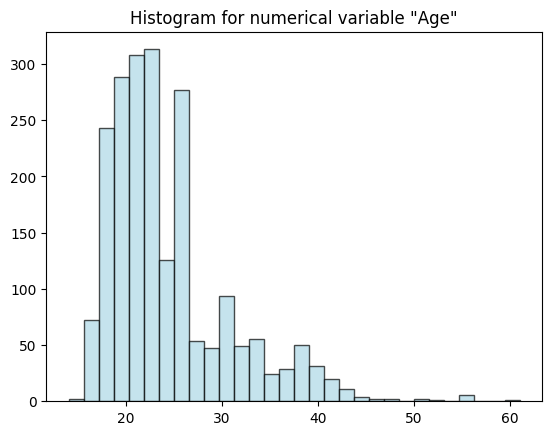

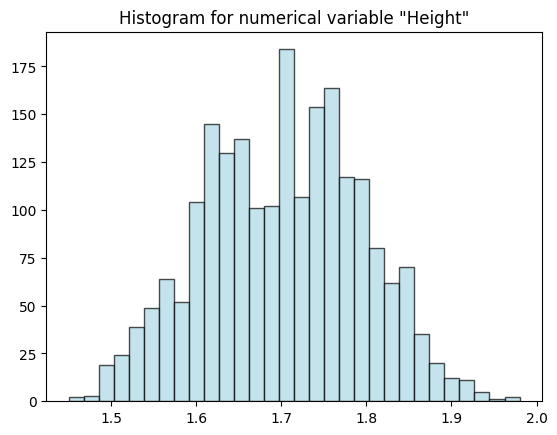

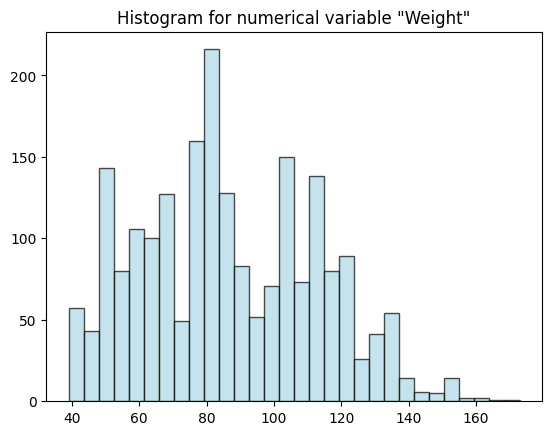

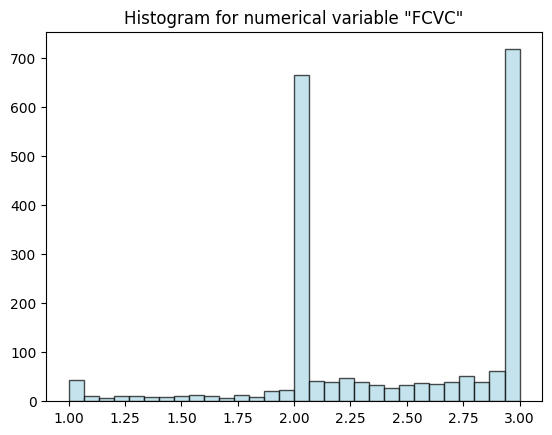

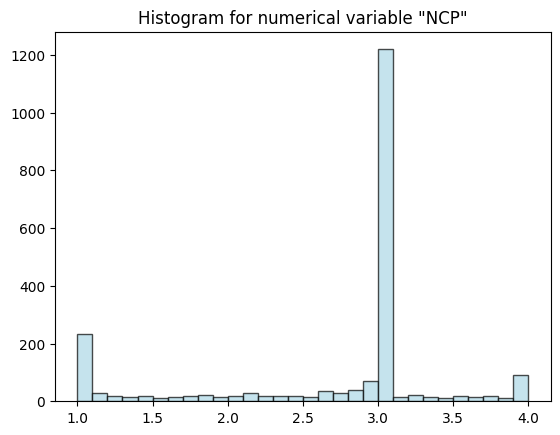

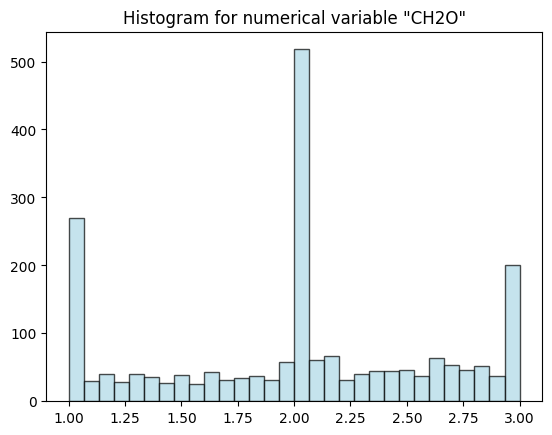

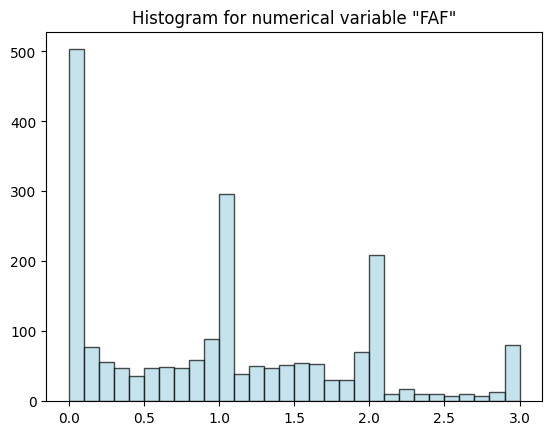

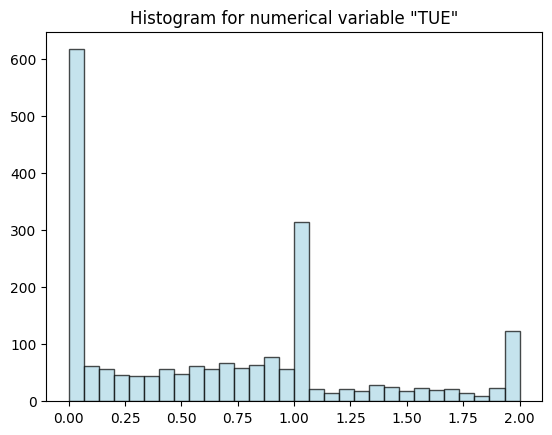

In [63]:
for numerical_var in numeric_variables:
    dataset_for_numerical_val = DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var]).astype(np.float64).reshape(-1)

    plt.figure()
    plt.hist(dataset_for_numerical_val, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram for numerical variable \"{numerical_var}\"")

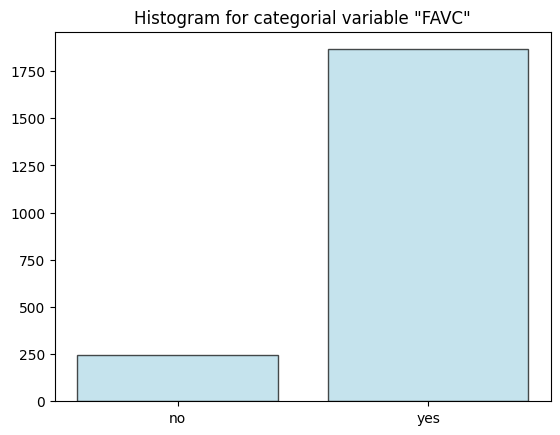

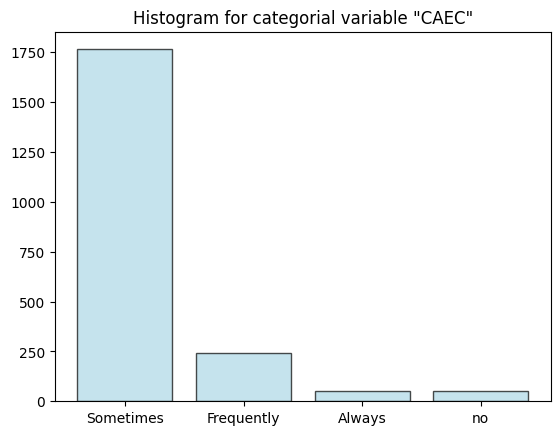

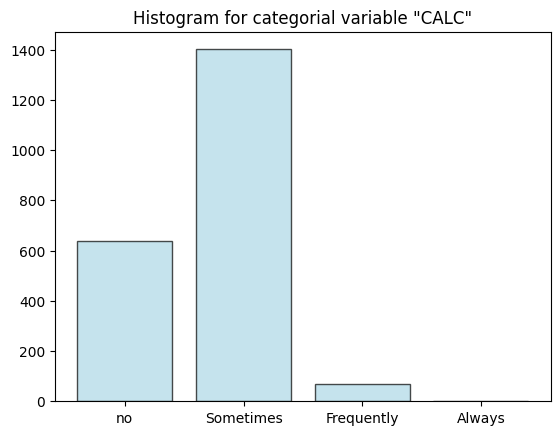

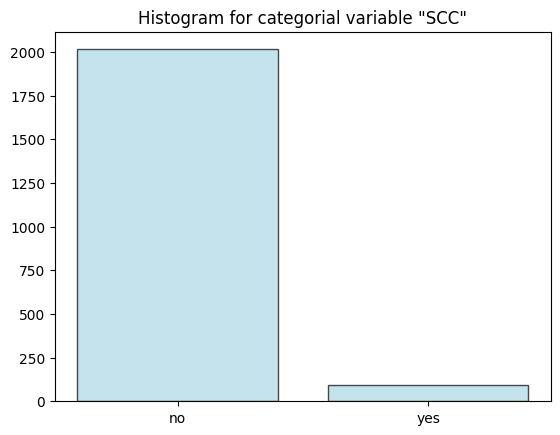

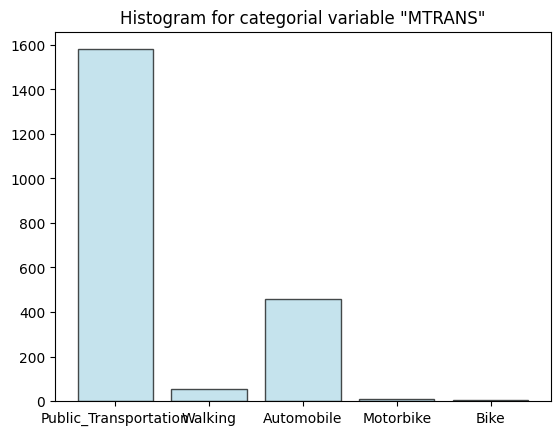

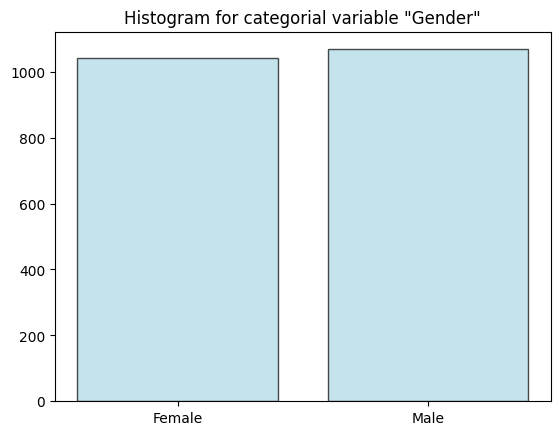

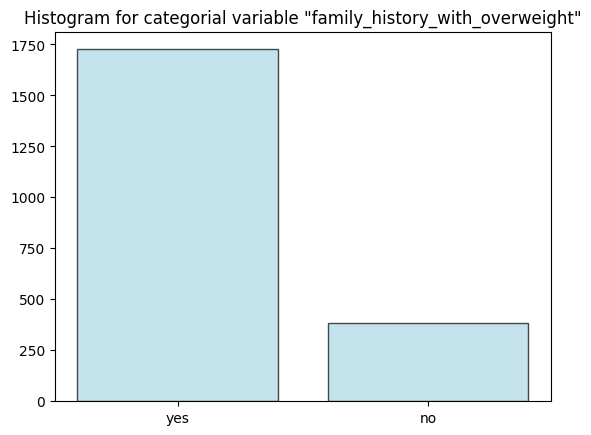

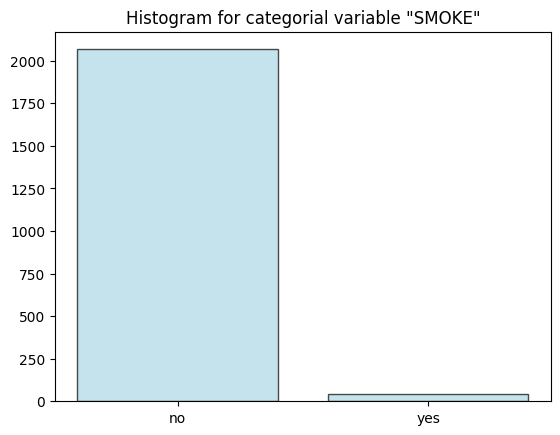

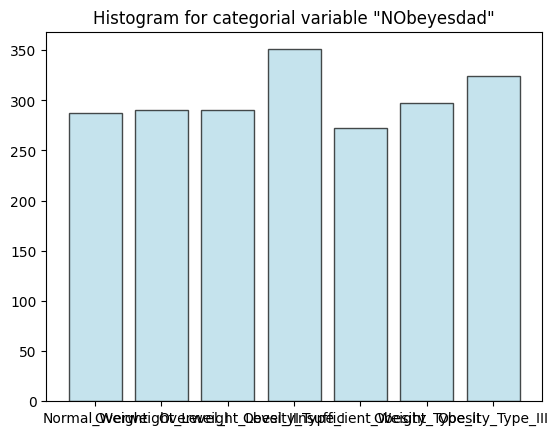

In [60]:
for categorial_var in categorical_values:
    dataset_for_categorial_val = DatasetManager.obj_list_to_flat_list(dataset_obj_list, [categorial_var])

    dataset_frequency = calculate_frequency_of_data_categorial(dataset_for_categorial_val)
    dataset_keys = [key for key in dataset_frequency]
    dataset_values = [dataset_frequency[key] for key in dataset_frequency]

    plt.figure()
    plt.bar(dataset_keys, dataset_values, color='lightblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram for categorial variable \"{categorial_var}\"")

#### 5.2. Density charts

Density charts plot how frequently we meet a data entry from the dataset and what distribution they follow.

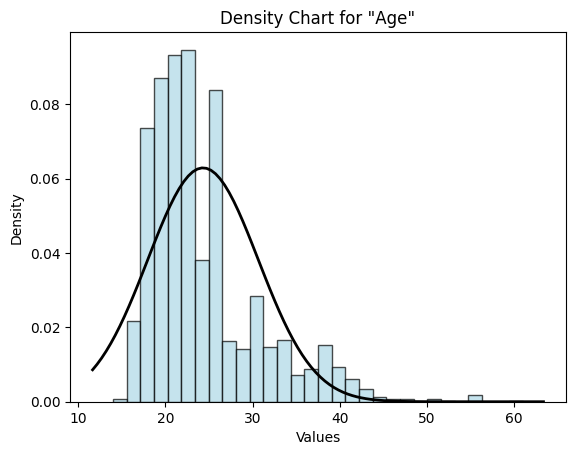

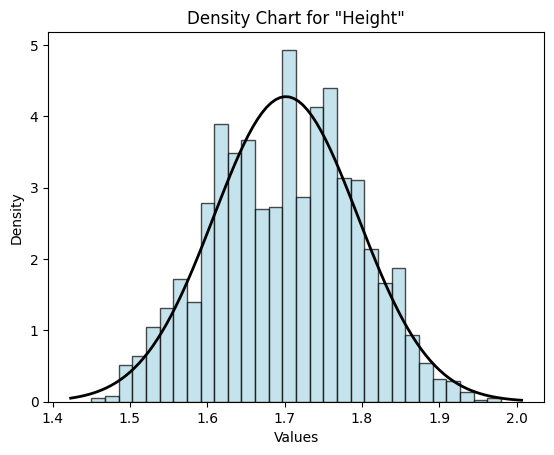

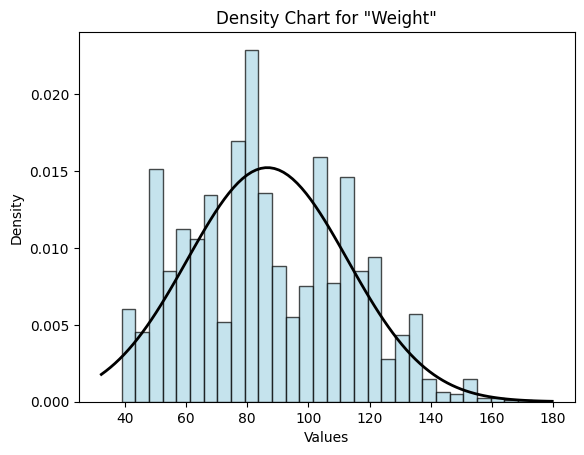

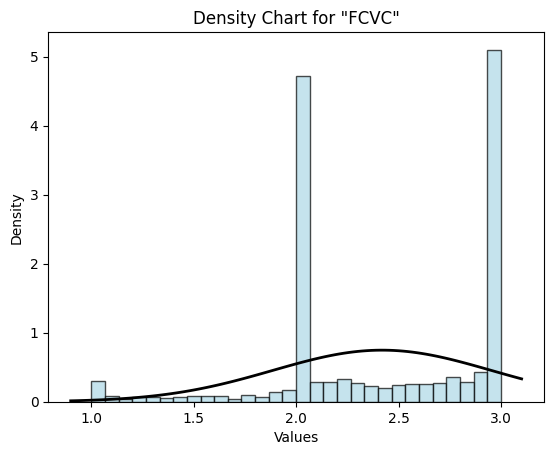

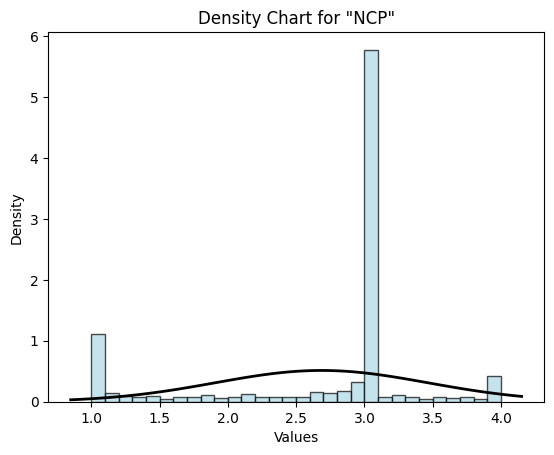

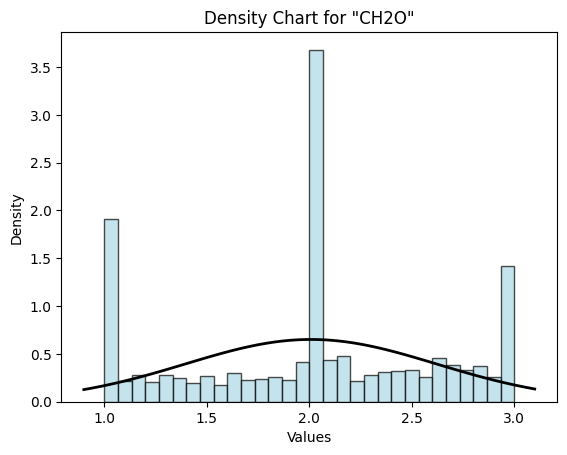

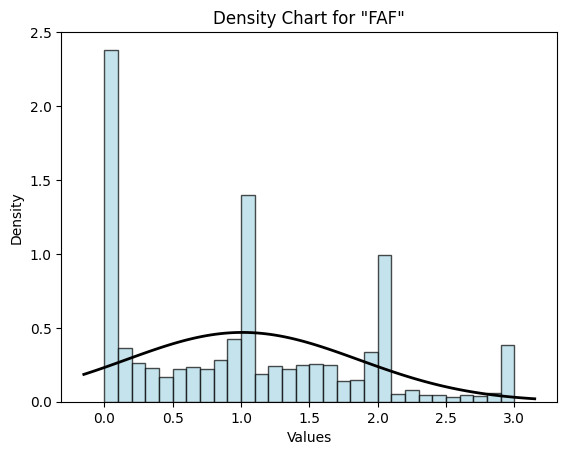

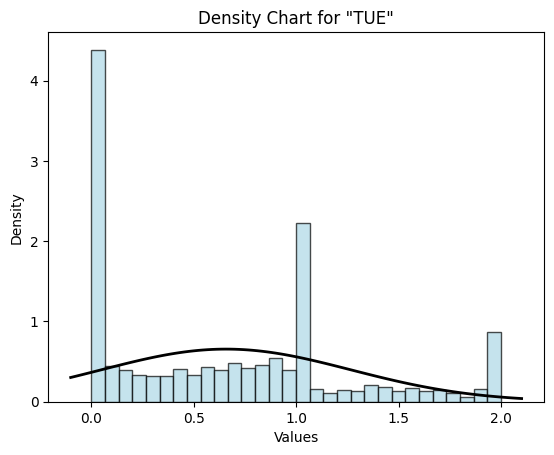

In [64]:
for numerical_var in numeric_variables:
    dataset_for_numerical_val = DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var]).astype(np.float64).reshape(-1)
 
    plt.figure()
    plt.hist(dataset_for_numerical_val, bins=30, density=True, color='lightblue', edgecolor='black', alpha=0.7)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(dataset_for_numerical_val), np.std(dataset_for_numerical_val))
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f"Density Chart for \"{numerical_var}\"")

#### 5.3. Boxplots

Boxplots charts show how the data "behaves":
* min
* max
* quantiles
* outliers
* median
* inter-quartile range (contains 50% of the data)
* Skewness of data
* Robustness to extreme values
* etc.

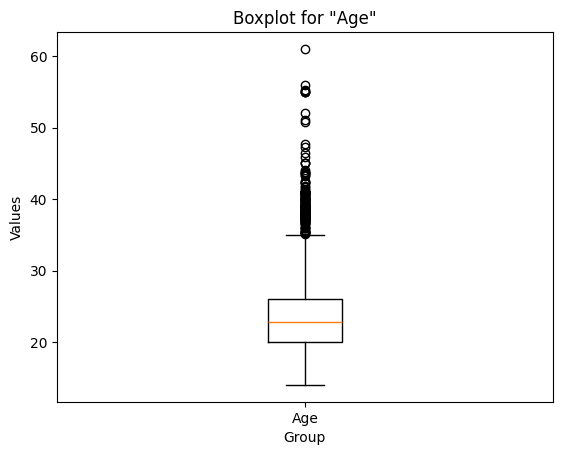

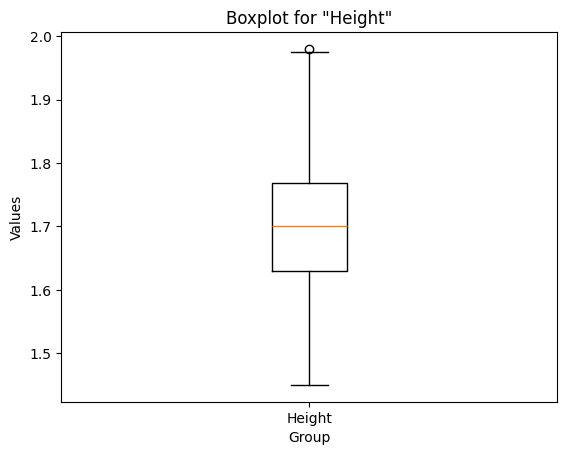

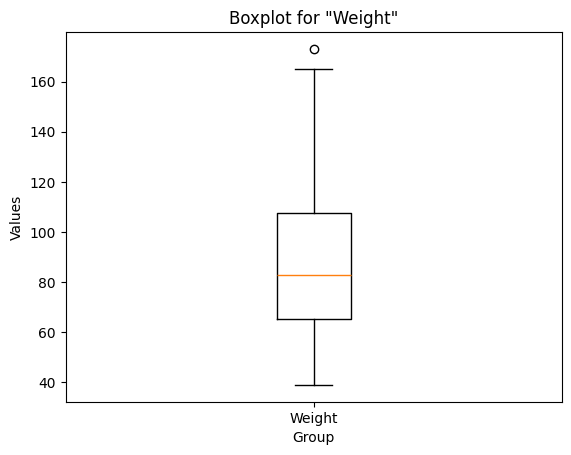

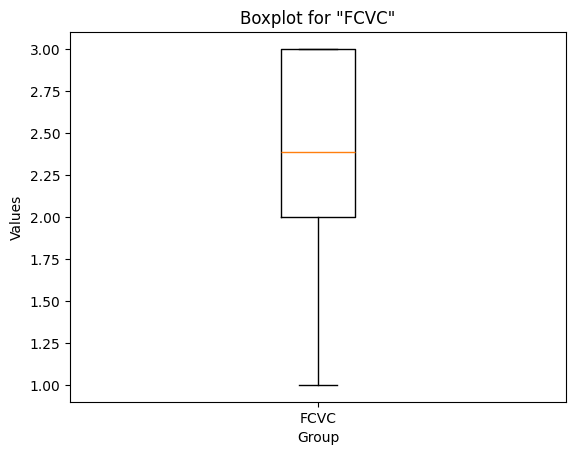

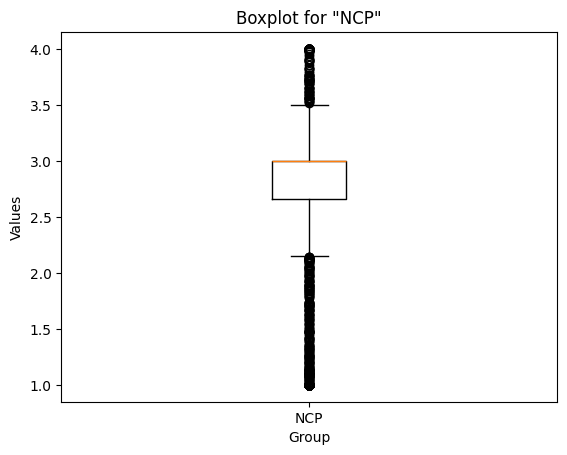

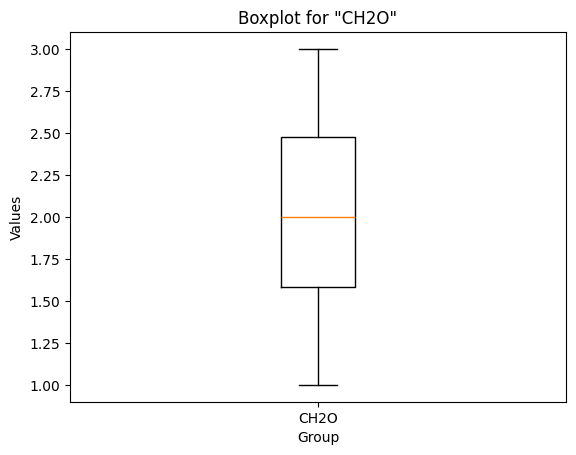

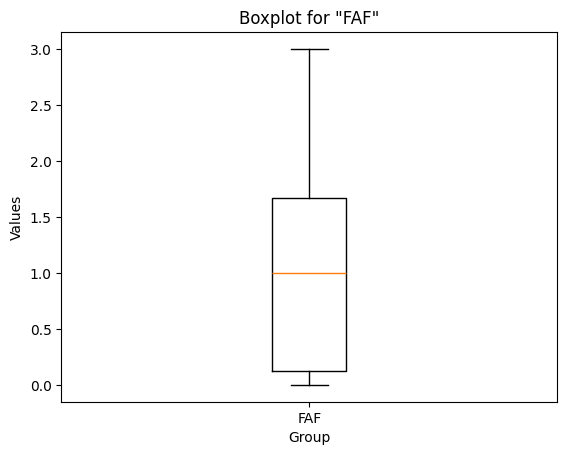

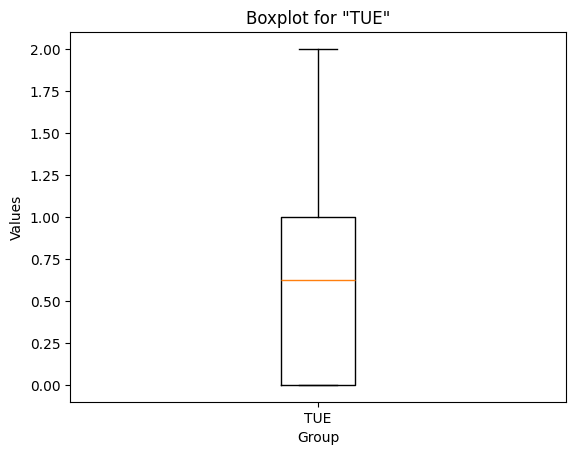

In [67]:
for numerical_var in numeric_variables:
    dataset_for_numerical_val = DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var]).astype(np.float64).reshape(-1)

    plt.figure()
    plt.boxplot(dataset_for_numerical_val, labels=[numerical_var])
    plt.xlabel("Group")
    plt.ylabel("Values")
    plt.title(f"Boxplot for \"{numerical_var}\"")

## Bivariate/multivariate analysis

The following will be applied:
1. correlations between data series
1. independence test
1. medium-test between populations
1. some visualisations:
    1. scatter-plots
    1. 3D graphs
    1. scatter-plots on main components
    1. non-linear mappings in 2d space: Sammon, t-SNE, uMap
    1. "projection pursuit" methodologies
    1. conditional boxplots
    1. overlaid histograms
    1. corrgrams 